In [1]:
# Collect Data
import pandas as pd
import numpy as np

data_path = "./Sweet Potato/data.csv"
sp_data = pd.read_csv(data_path, header=0)

label = {'U.S. No. 1':1,'Cull':-1}
Y = np.array(sp_data['Shape'].map(label))

sp_data = np.array(sp_data)
sp_data1 = sp_data[:,1:8]
sp_data2 = sp_data[:,9:12]
diameters = sp_data[:,12:43]
sdRads = sp_data[:,43:71]
sp_data3 = sp_data[:,71].reshape(-1,1)

sp_data  = np.concatenate((sp_data1, sp_data2, sp_data3),axis=1)
print(sp_data[0,:])

[6.60323851 6.09377574 1.124095343 1.850741952 2.976497616 0.410901886
 0.062227328 6.192336624 0.066356516 9.933092284 1.806340361]


In [2]:
import DFE_object

              precision    recall  f1-score   support

         0.0       0.79      0.53      0.63       139
         1.0       0.62      0.85      0.72       128

    accuracy                           0.68       267
   macro avg       0.71      0.69      0.68       267
weighted avg       0.71      0.68      0.67       267



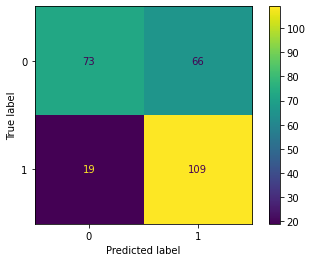

(array([[ 73,  66],
        [ 19, 109]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1ff71ba8ca0>)

In [3]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(pd.DataFrame(diameters))
dfeo.import_from_pandas(pd.DataFrame(sdRads))
dfeo.import_from_pandas(pd.DataFrame(Y), y = 0, categorical = 0)

out_diam = dfeo.data_in["Entry_0"]['raw_data']

# Dimension Reduction: PCA
dfeo.my_ICA("Entry_0")
dfeo.my_ICA("Entry_1")

dfeo.normalize("Entry_0")
dfeo.normalize("Entry_1")

# Fusion
dfeo.concatenate()

# Classification: Naive Bayes
dfeo.naive_bayes()
dfeo.classification_report()

              precision    recall  f1-score   support

        -1.0       0.67      0.44      0.53       127
         1.0       0.61      0.80      0.69       140

    accuracy                           0.63       267
   macro avg       0.64      0.62      0.61       267
weighted avg       0.64      0.63      0.62       267



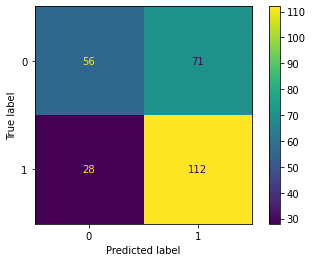

(array([[ 56,  71],
        [ 28, 112]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1ff71bb5400>)

In [4]:
# Create DFE object
dfeo = DFE_object.DFE_object()

# Upload data
dfeo.import_from_pandas(pd.DataFrame(diameters))
dfeo.import_from_pandas(pd.DataFrame(sdRads))
dfeo.import_from_pandas(pd.DataFrame(Y), y = 0)

# Dimension Reduction: PCA
dfeo.my_PCA("Entry_0")
dfeo.my_PCA("Entry_1")

dfeo.normalize("Entry_0")
dfeo.normalize("Entry_1")

# Fusion
dfeo.concatenate()

# Classification: Naive Bayes
dfeo.naive_bayes()
dfeo.classification_report()